In [5]:
import os

import math, random
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 5))

import torch
import torchaudio
from torchaudio import transforms

import librosa
import librosa.display

from IPython.display import Audio

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lets get to know the data better

In [6]:
DATA_DIR = '/content/drive/MyDrive/dataset'
audio_files = os.listdir(DATA_DIR)

{'F': 92, 'I': 221, 'B': 127, 'MC': 188, 'EU': 252, 'MN': 76, 'FN': 277}


<BarContainer object of 2 artists>

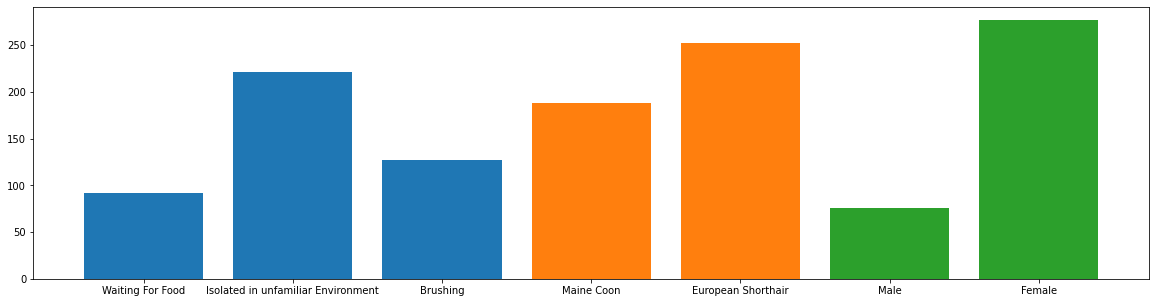

In [7]:
# Summary Statistics

category_count = {'F':0,'I':0,'B':0,'MC':0,'EU':0,'MN':0,'FN':0}

for file in audio_files:
    decoded = file.split('_')
    for element in decoded:
        if element in category_count.keys():
            category_count[element] +=1
print(category_count)

label = {
    'Waiting For Food':category_count['F'],
    'Isolated in unfamiliar Environment':category_count['I'],
    'Brushing':category_count['B'],
}
breed = {
    'Maine Coon':category_count['MC'],
    'European Shorthair':category_count['EU'],
}
gender = {
    'Male':category_count['MN'],
    'Female':category_count['FN'],
}
plt.bar(list(label.keys()),list(label.values()))
plt.bar(list(breed.keys()),list(breed.values()))
plt.bar(list(gender.keys()),list(gender.values()))

Let us now find out about the lengths of the provided audio samples

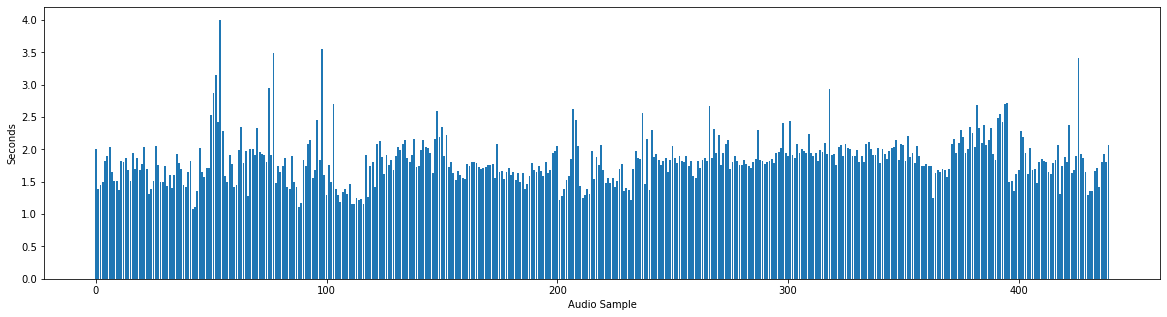

In [8]:
audio_lengths = []

for file in audio_files:
    audio_lengths.append(librosa.get_duration(filename=os.path.join(DATA_DIR,file)))

sample_num = np.arange(len(audio_lengths))

plt.bar(sample_num, audio_lengths)
plt.xlabel("Audio Sample")
plt.ylabel("Seconds")
plt.show()

# Seeing Sounds!
sounds strange !?!?

In [9]:
# /content/drive/MyDrive/dataset
sample_audio = '/content/drive/MyDrive/dataset/B_ANI01_MC_FN_SIM01_101.wav'

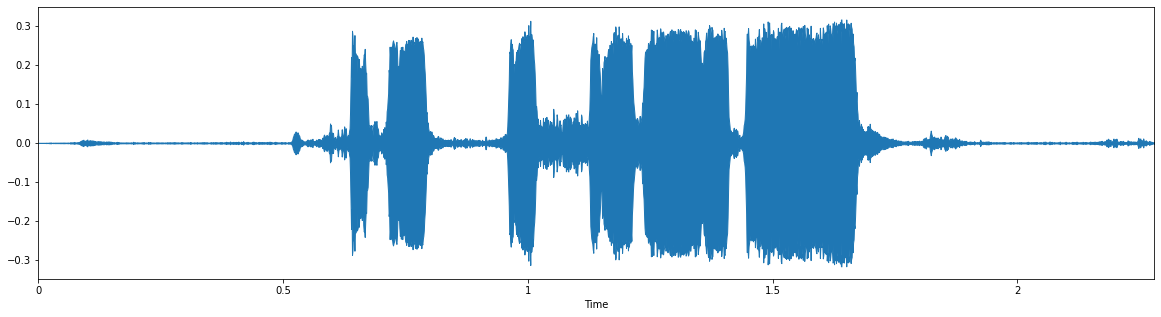

In [10]:
samples, sample_rate = librosa.load(sample_audio)
librosa.display.waveplot(samples, sr=sample_rate)

## Spectrogram

When dealing with Audio data, Deep Learning models tend not take to directly take the waveform as the input but as a spectrogram. 

**What is a spectrogram?**
> A spectrogram is a visual way of representing a signals's strength or loudness over time at various frequencies present in a particular waveform. Not only can one see wheather there is more less energy at two particular frequencies, but one can also see how energy levels vary over time.

Spectrograms are generated from sound signals using Fourier Transforms. A Fourier Transform decomposes the signal into its constituent frequencies and displays the amplitude of each frequency present in the signal.

A Spectrogram chops up the duration of the sound signal into smaller time segments and then applies the Fourier Transform to each segment, to determine the frequencies contained in that segment. It then combines the Fourier Transforms for all those segments into a single plot.

It plots Frequency (y-axis) vs Time (x-axis) and uses different colors to indicate the Amplitude of each frequency. The brighter the color the higher the energy of the signal.

A spectrogram now boils down to an image. Now that we have a picture representing a sound we can train all sorts of vision based models to deal with the given audio.

## Mel Spectrogram
Humans percieve frequencies on a logarithmic scale rather than a linear scale. To account for this difference, the Mel Scale was developed.
> The mel scale is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments.

![Mel Scale](https://www.sfu.ca/sonic-studio-webdav/handbook/Graphics/Mel.gif)

A Mel spectrogram differs from a regular spectrogram by
1. It uses the Mel Scale instead of Frequency
2. It uses Decibel scale instead of amplitude to indicate colour

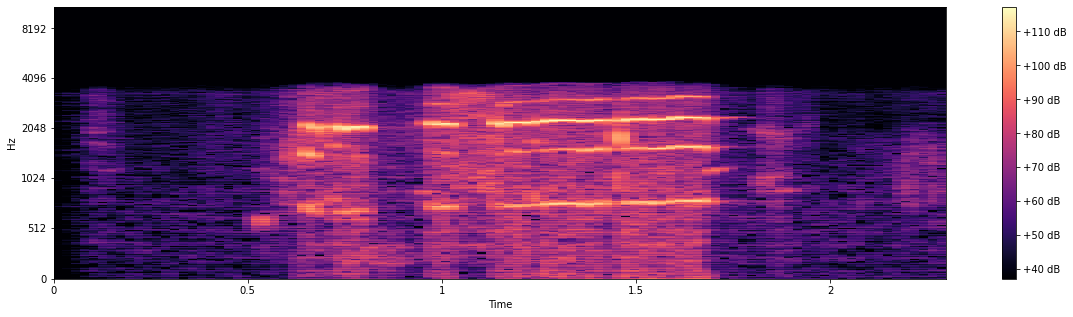

In [11]:
sgram = librosa.stft(samples)
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate,n_mels=512)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# Resources
1. [Audio Deep Learning Made Simple](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505)

2. [librosa docs](https://librosa.org/doc/latest/index.html)
